# <center> HEART DISEASE PREDICTION </center>

Heart disease prediction using 3 machine learning models.
1. Support Vector Machine 
2. K Nearset Neighbour 
3. ANN Multilayer Perceptron

## DATA DESCRIPTION

South Africa Heart Disease Dataset
Source:<br>
https://web.stanford.edu/~hastie/ElemStatLearn//data.html<br>
https://www.openml.org/d/1498


A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical
Journal. 

Attributes:

1. sbp systolic blood pressure 
2. tobacco cumulative tobacco (kg) 
3. ldl low densiity lipoprotein cholesterol 
4. adiposity 
5. famhist family history of heart disease (Present, Absent) 
6. typea type-A behavior 
7. obesity 
8. alcohol current alcohol consumption 
9. age age at onset 
10. chd response, coronary heart disease 

In [1]:
# Importing primary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### DATA PREPROCESSING  

In [2]:
# Reading the data 
data = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaXZe')

In [3]:
# Setting up the column
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']

In [4]:
data.columns=column

In [5]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [6]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


Describes the statistical data insights

In [7]:
# Checking for any missing values 
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

The values shown are 0, therefore no missing values in the DataFrame

In [8]:
# Feature Scaling, making categorical data precise 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

In [9]:
data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range =(0,100))

In [11]:
# setting scale of max min value for sbp in range of 0-100, normalise
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

/home/sahil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [13]:
# Data after modification
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.903282,3.635649,4.740325,25.406732,0.584416,53.103896,26.044113,17.044394,42.816017,0.346320
std,17.518220,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,0.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,19.658120,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,28.205128,2.000000,4.340000,26.115000,1.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,40.170940,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,100.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


The variation of values across the DataFrame for first 50 values

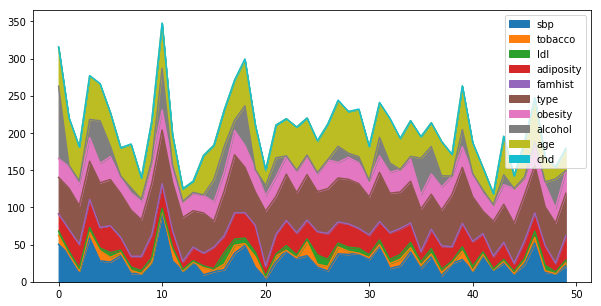

In [14]:
data.head(50).plot(kind='area',figsize=(10,5))

Distribution of Obesity according to the age

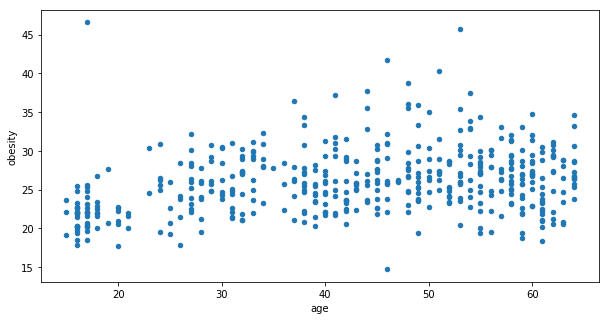

In [15]:
data.plot(x='age',y='obesity',kind='scatter',figsize =(10,5))

Distribution of Tobacco consumption across age

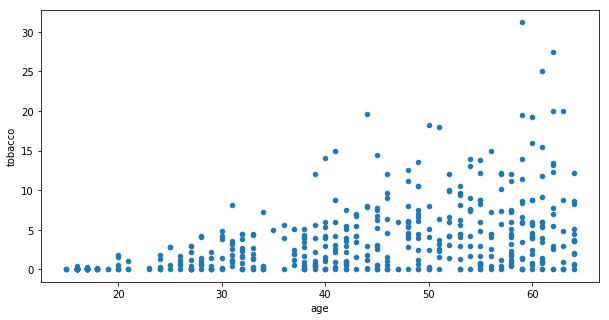

In [16]:
data.plot(x='age',y='tobacco',kind='scatter',figsize =(10,5))

Distribution of Alcohol consumption across age

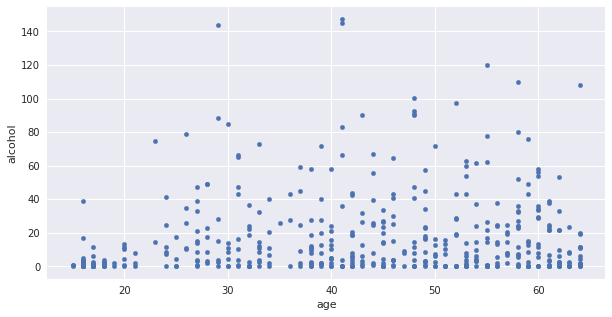

In [121]:
data.plot(x='age',y='alcohol',kind='scatter',figsize =(10,5))

Histogram of various freatures in DataFrame

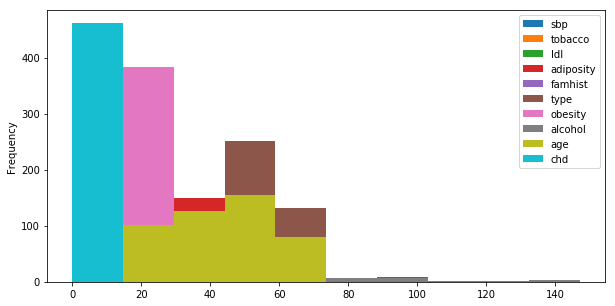

In [17]:
data.plot(kind = 'hist',figsize =(10,5))

Box graph of the Features, representing:<br> Upper Extreme <br> Upper Quartile <br> Median <br> Lower Quartile <br> Lower Extreme

In [24]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')

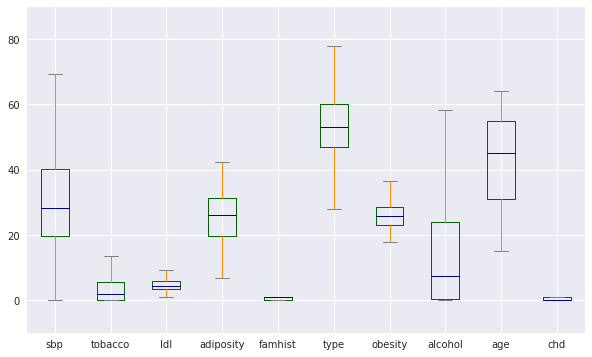

In [25]:
data.plot(kind='box',figsize=(10,6),color=color,ylim=[-10,90])

In [22]:
# splitting the data into test and train  having a test size of 20% and 80% train size
from sklearn.model_selection import train_test_split
col = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age']
X_train, X_test, y_train, y_test = train_test_split(data[col], data['chd'], test_size=0.2, random_state=1234)

Now, the results of the model does depends on the random state on which we distribute the data, since it's too small data the model understand relative pattern with given test set 
at random state 42, we obtain results as SVM,ANN and lest with KNN
at random state 1234, we obtain results as ANN,SVM and least with KNN

To overcome this issue, we've used K-fold too, to increase the accuracy, which gives much higher accuracy as the fold increase and a small increase in mean accuracy too.

Heatmap Of the realtion features

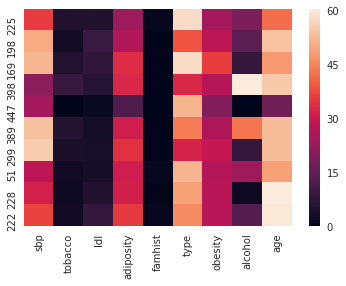

In [23]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

In [27]:
X_all = data[col]
y_all = data['chd']

Data preprocessing is complete,
implementing the models

# <center> MODEL 1 - Support Vector Machine</center>

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.<br>
Description : https://en.wikipedia.org/wiki/Support_vector_machine <br>
Kernel used : Linear<br>
Degree =3<br>
Gamma = Auto

In [28]:
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [29]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred_svm =svm_clf.predict(X_test)

In [31]:
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0])

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[51,  9],
       [15, 18]])

In [34]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.7419354838709677


In [44]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.85, 0.7391304347826086)

## Accuracy : 0.741
## Recall : 0.85
## Precision : 0.739

# <center> MODEL 2 - K Nearest Neighbour</center>

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. ... In k-NN classification, the output is a class membership.<br>
Description : https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm<br>
Neighbors =5<br>
N jobs = No of cores ,-1<br>
Leaf size =60<br>
Algorithm = Brute

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [125]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [126]:
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [127]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[49, 11],
       [22, 11]])

In [128]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.6451612903225806

In [129]:
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_knn,precision_knn

(0.8166666666666667, 0.8166666666666667)

## Accuracy : 0.645
## Recall : 0.816
## Precision : 0.816

### <center>Cross Validation with KFold</center>

Cross Validation recovers from the random state difference by diving the complete data set in K parts, and iteratively learns from data.<br>
Folds =10

In [64]:
from sklearn.cross_validation import KFold

fold_list =[]
accuracy_list =[]
def run_kfold(knn_clf):
    kf = KFold(297, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        knn_clf.fit(X_train, y_train)
        predictions = knn_clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
        fold_list.append(fold)
        accuracy_list.append(accuracy)
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(knn_clf)
    

Fold 1 accuracy: 0.36666666666666664
Mean Accuracy: 0.36666666666666664
Fold 2 accuracy: 0.6
Mean Accuracy: 0.4833333333333333
Fold 3 accuracy: 0.7
Mean Accuracy: 0.5555555555555555
Fold 4 accuracy: 0.7
Mean Accuracy: 0.5916666666666666
Fold 5 accuracy: 0.6
Mean Accuracy: 0.5933333333333333
Fold 6 accuracy: 0.7
Mean Accuracy: 0.611111111111111
Fold 7 accuracy: 0.6
Mean Accuracy: 0.6095238095238094
Fold 8 accuracy: 0.5172413793103449
Mean Accuracy: 0.5979885057471264
Fold 9 accuracy: 0.6206896551724138
Mean Accuracy: 0.6005108556832695
Fold 10 accuracy: 0.6206896551724138
Mean Accuracy: 0.6025287356321838


Box plot of the iterative learning by K Fold in K-Nearest Neighbors

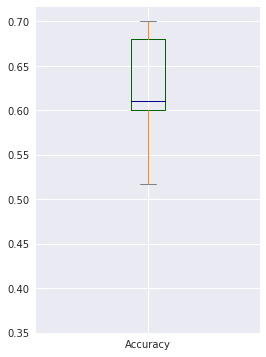

In [135]:
fold_df =pd.DataFrame({'Fold':fold_list,'Accuracy':accuracy_list}).set_index('Fold')
fold_df.plot(kind='box',figsize=(4,6),color=color)

### Fold 10 accuracy: 0.7586206896551724 
### Mean Accuracy: 0.6501149425287356

# MODEL 3 - ANN Multilayer Perceptron Classifier

### <center> ANN implementation using Scikit learn library </center>

Input nodes : 9<br>
Hidden layers :2<br>
Each hidden Layer Hold 14 neuron<br>
Output layer : 2

In [137]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [138]:
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1]}

In [139]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

In [140]:
# Fit the best algorithm to the data 
ann_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=14, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [141]:
y_pred_ann = ann_clf.predict(X_test)

In [142]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann

array([[52,  8],
       [14, 19]])

In [143]:
ann_result = accuracy_score(y_test,y_pred_ann)
ann_result

0.7634408602150538

In [144]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.8666666666666667, 0.7323943661971831)

## Accuracy : 0.763
## Recall : 0.866
## Precision : 0.732

### <center> ANN implementation using keras library </center>

Sequential Model
Input node :9
Hidden layer :2
Each layer hold 6 neuron

In [159]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 9))

# Adding the second hidden layer
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_annk = confusion_matrix(y_test, y_pred)

/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/sahil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
369/369 [==============================] - 0s 754us/step - loss: 0.6856 - acc: 0.5420
Epoch 2/100
369/369 [==============================] - 0s 114us/step - loss: 0.6554 - acc: 0.6558
Epoch 3/100
369/369 [==============================] - 0s 124us/step - loss: 0.6483 - acc: 0.6558
Epoch 4/100
369/369 [==============================] - 0s 155us/step - loss: 0.6459 - acc: 0.6558
Epoch 5/100
369/369 [==============================] - 0s 113us/step - loss: 0.6386 - acc: 0.6558
Epoch 6/100
369/369 [==============================] - 0s 104us/step - loss: 0.6334 - acc: 0.6558
Epoch 7/100
369/369 [==============================] - 0s 145us/step - loss: 0.6301 - acc: 0.6558
Epoch 8/100
369/369 [==============================] - 0s 102us/step - loss: 0.6234 - acc: 0.6585
Epoch 9/100
369/369 [==============================] - 0s 113us/step - loss: 0.6189 - acc: 0.6667
Epoch 10/100
369/369 [==============================] - 0s 124us/step - loss: 0.6127 - acc: 0.6802
Epoch 11/100
369/36

369/369 [==============================] - 0s 145us/step - loss: 0.5303 - acc: 0.7371
Epoch 84/100
369/369 [==============================] - 0s 216us/step - loss: 0.5255 - acc: 0.7290
Epoch 85/100
369/369 [==============================] - 0s 202us/step - loss: 0.5367 - acc: 0.7317
Epoch 86/100
369/369 [==============================] - 0s 179us/step - loss: 0.5387 - acc: 0.7317
Epoch 87/100
369/369 [==============================] - 0s 147us/step - loss: 0.5314 - acc: 0.7182
Epoch 88/100
369/369 [==============================] - 0s 170us/step - loss: 0.5305 - acc: 0.7263
Epoch 89/100
369/369 [==============================] - 0s 189us/step - loss: 0.5292 - acc: 0.7371
Epoch 90/100
369/369 [==============================] - 0s 152us/step - loss: 0.5250 - acc: 0.7534
Epoch 91/100
369/369 [==============================] - 0s 174us/step - loss: 0.5257 - acc: 0.7209
Epoch 92/100
369/369 [==============================] - 0s 145us/step - loss: 0.5253 - acc: 0.7371
Epoch 93/100
369/369 [=

Confusion matrix obtained from keras NN 

In [84]:
cm_annk

array([[45, 15],
       [11, 22]])

In [93]:
recall_annk = cm_annk[0][0]/(cm_annk[0][0] + cm_annk[0][1])
precision_annk = cm_annk[0][0]/(cm_annk[0][0]+cm_annk[1][1])
recall_annk,precision_annk

(0.7833333333333333, 0.7014925373134329)

## Accuracy  ~  0.7317
## Recall : 0.783
## Precision : 0.701

## Comparison of models

In [130]:
results ={'Accuracy': [svm_result*100,knn_result*100,ann_result*100],
          'Recall': [recall_svm*100,recall_knn*100,recall_ann*100],
          'Precision': [precision_svm*100,precision_knn*100,precision_ann*100]}
index = ['SVM','KNN','ANN']

In [131]:
results =pd.DataFrame(results,index=index)

Bar Plot of three model implemented<br>
X axis : Models<br>
Y axis : Values of Accuracy, Precision,Recall

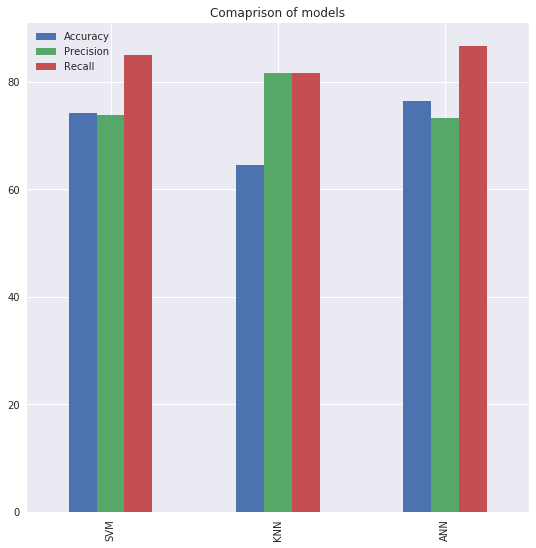

In [157]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')


Zoomed view having lower y limit 50, higher y limit 100, for better view 

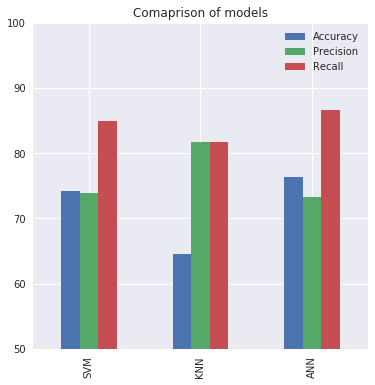

In [158]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(6,6),ylim=[50,100]).get_figure()
fig.savefig('image.png')

Subplot of each measure in between the models

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f7519fcc0>,
      dtype=object)

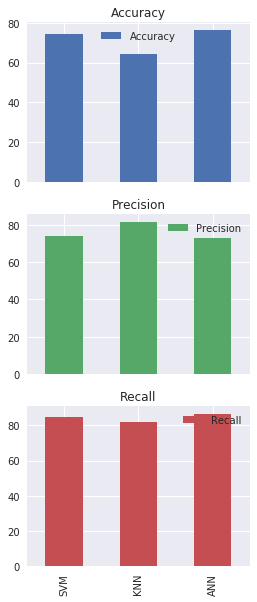

In [153]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

In [ ]:
Saving graph images
DataFrame
fig = class_counts.plot().get_figure()
fig.savefig('image.png')